# Toxic Plant Classification - Data Scrape
### Scroll down to "Scrape google for more training images" for data scraping procedure

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2                 ##for image processing
import PIL                 ##for image import and processing
import os                   

In [2]:
# Load Image Arrays and Corresponding Labels (downloaded from Herbarium 2022 data on kaggle)
## https://www.kaggle.com/competitions/herbarium-2022-fgvc9/data
pp = "../data/"
with open(pp+'image-arrays.npy', 'rb') as f:
    X = np.load(f)
with open(pp+'labels.npy', 'rb') as f:
    y = np.load(f)

In [3]:
pp = "../data/"
meta_data = pd.read_csv(pp+'herb22meta_data.csv').drop(labels="Unnamed: 0", axis=1)
meta_data

,id,category,path,scientific_name,family,genus,species,parent_folder,child_folder
0,00000__001,0,000/00/00000__001.jpg,Abies amabilis (Douglas ex Loudon) J.Forbes,Pinaceae,Abies,amabilis,0,0
1,00001__001,1,000/01/00001__001.jpg,Abies balsamea (L.) Mill.,Pinaceae,Abies,balsamea,0,1
2,00002__001,2,000/02/00002__001.jpg,Abies bracteata (D.Don) Poit.,Pinaceae,Abies,bracteata,0,2
3,00003__001,3,000/03/00003__001.jpg,Abies concolor (Gordon & Glend.) Lindl. ex Hil...,Pinaceae,Abies,concolor,0,3
4,00004__001,4,000/04/00004__001.jpg,Abies fraseri (Pursh) Poir.,Pinaceae,Abies,fraseri,0,4
...,...,...,...,...,...,...,...,...,...
15496,15500__017,15500,155/00/15500__017.jpg,Zostera marina L.,Zosteraceae,Zostera,marina,155,0
15497,15501__001,15501,155/01/15501__001.jpg,Zuloagaea bulbosa (Kunth) Bess,Poaceae,Zuloagaea,bulbosa,155,1
15498,15502__011,15502,155/02/15502__011.jpg,Zygophyllum californicum (Benth.) Christenh. &...,Zygophyllaceae,Zygophyllum,californicum,155,2
15499,15503__011,15503,155/03/15503__011.jpg,Zygophyllum laeve (Standl.) Christenh. & Byng,Zygophyllaceae,Zygophyllum,laeve,155,3


In [4]:
# DICTIONARIES
map_name_to_cat_id = dict(zip(meta_data.scientific_name, meta_data.category))
map_label_to_name = dict(zip(range(15501), sorted(set(meta_data.scientific_name))))
# invert
map_cat_to_name = {c: n for c, n in map_name_to_cat_id.items()}
map_name_to_index = {n: i for n, i in map_label_to_name.items()}

In [5]:
def show_image(category):
    """
    Plot the example image for the category
    """
    cat_to_name = dict(zip(meta_data.category, meta_data.scientific_name))
    name_to_index = dict(zip(sorted(set(meta_data.scientific_name)), range(15501)))
    name = cat_to_name[category]
    index = name_to_index[name]
    image = X[index]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return name, image
    #plt.imshow(image)
    #plt.title(name+" | "+str(category))
    #plt.show()

In [6]:
meta_data[meta_data.scientific_name.str.contains("Toxic")]

,id,category,path,scientific_name,family,genus,species,parent_folder,child_folder
14621,14625__001,14625,146/25/14625__001.jpg,Toxicodendron diversilobum (Torr. & A.Gray) Gr...,Anacardiaceae,Toxicodendron,diversilobum,146,25
14622,14626__002,14626,146/26/14626__002.jpg,Toxicodendron pubescens Mill.,Anacardiaceae,Toxicodendron,pubescens,146,26
14623,14627__002,14627,146/27/14627__002.jpg,Toxicodendron radicans (L.) Kuntze,Anacardiaceae,Toxicodendron,radicans,146,27
14624,14628__001,14628,146/28/14628__001.jpg,Toxicodendron rydbergii (Small ex Rydb.) Greene,Anacardiaceae,Toxicodendron,rydbergii,146,28
14625,14629__002,14629,146/29/14629__002.jpg,Toxicodendron vernix (L.) Kuntze,Anacardiaceae,Toxicodendron,vernix,146,29
14626,14630__001,14630,146/30/14630__001.jpg,Toxicoscordion brevibracteatum (M.E.Jones) R.R...,Melanthiaceae,Toxicoscordion,brevibracteatum,146,30
14627,14631__002,14631,146/31/14631__002.jpg,Toxicoscordion fontanum (Eastw.) Zomlefer & Judd,Melanthiaceae,Toxicoscordion,fontanum,146,31
14628,14632__002,14632,146/32/14632__002.jpg,Toxicoscordion fremontii (Torr.) Rydb.,Melanthiaceae,Toxicoscordion,fremontii,146,32
14629,14633__001,14633,146/33/14633__001.jpg,Toxicoscordion micranthum (Eastw.) A.Heller,Melanthiaceae,Toxicoscordion,micranthum,146,33
14630,14634__001,14634,146/34/14634__001.jpg,Toxicoscordion nuttallii (A.Gray) Rydb.,Melanthiaceae,Toxicoscordion,nuttallii,146,34


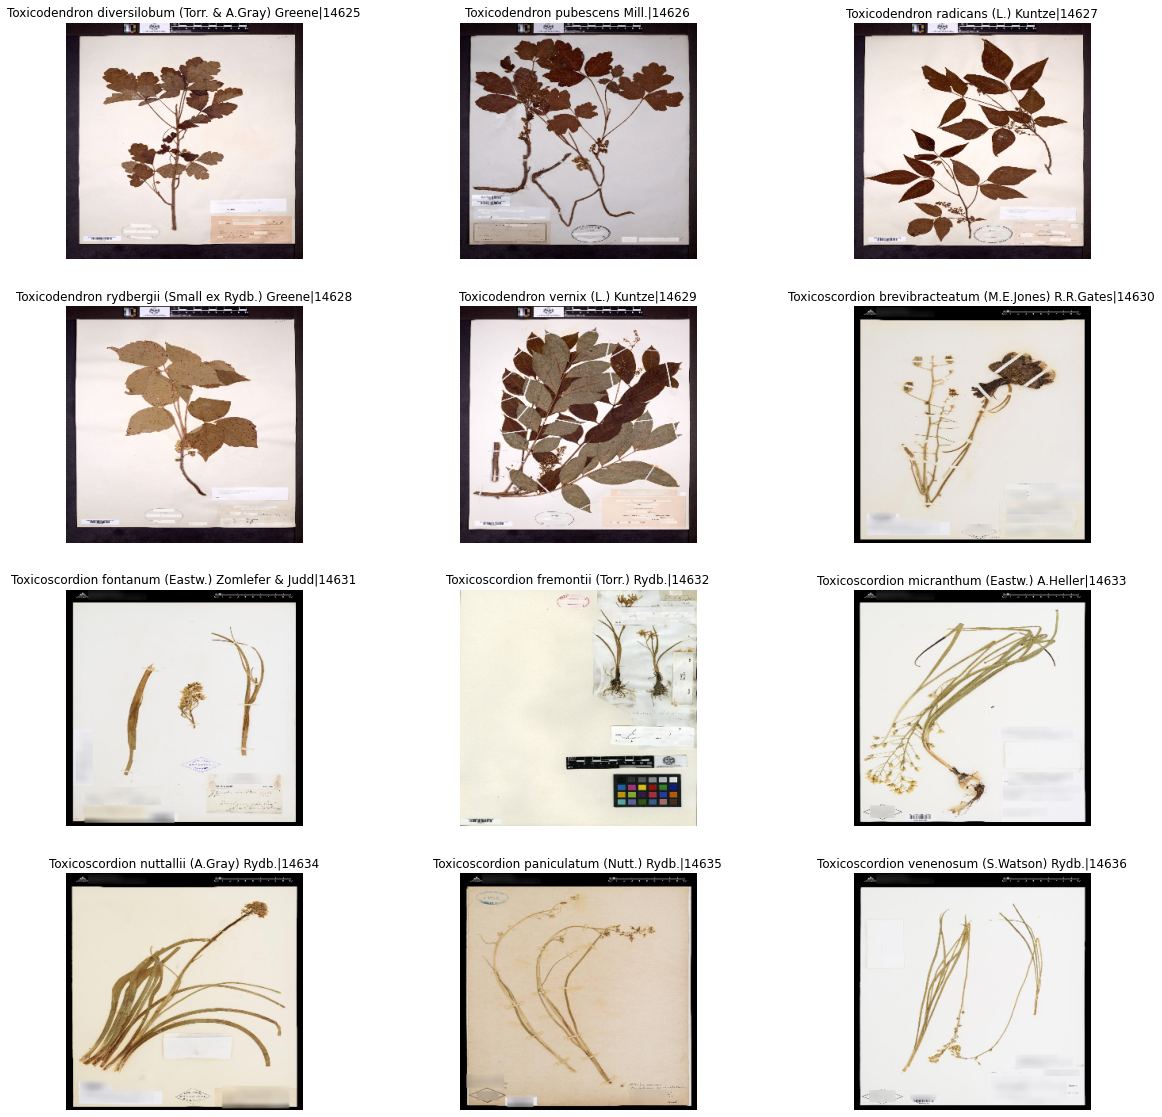

In [7]:
# PLOT TOXIC PLANTS
toxic_cats = [c for c in meta_data[meta_data.scientific_name.str.contains("Toxic")].category] 
fig, ax = plt.subplots(4, 3, figsize=(20,20))

for idx, t in zip(np.ndindex(ax.shape), toxic_cats):
    name, image = show_image(t)
    ax[idx].imshow(image)
    ax[idx].set_title(name+"|"+str(t))
    ax[idx].axis('off')
plt.show()

- Western (Pacific) poison oak: Toxicodendron diversilobum  | 14625  
- Eastern (Atlantic) poison oak: Toxicodendron pubescens  | 14626  
- Eastern Poison ivy: Toxicodendron radicans   | 14627  
- Western poison ivy: Toxicodendron rydbergii  | 14628  
- Poison sumac: Toxicodendron vernix   | 14629  

What plants to people most often confused with poison oak and ivy? [Link](https://www.brandywine.org/conservancy/blog/poison-ivy-vs-look-alike-species)
- Virginia creeper: Parthenocissus quinquefolia  | 10340  
- Boxelder: Acer negundo L. | 83  
- Jack-in-the-pulpit: Arisaema triphyllum | 1055  
- American hog-peanut: Amphicarpaea bracteata | 610  
- Fragrant Sumac: Rhus aromatica | 12479  

In [8]:
meta_data[meta_data.scientific_name.str.contains("Rhus aromatica")]

,id,category,path,scientific_name,family,genus,species,parent_folder,child_folder
12475,12479__001,12479,124/79/12479__001.jpg,Rhus aromatica Aiton,Anacardiaceae,Rhus,aromatica,124,79


In [9]:
cat_to_toxic = {14625:0, 14626:1, 14627:2, 14628:3, 14629:4, 'other':5}
cat_to_slang = {14625:"Western poison oak", 14626:"Eastern poison oak", 
                14627:"Eastern poison ivy", 14628:"Western poison ivy", 
                14629:"Poison sumac", 'other':"other"}

toxic_to_cat = {t: c for c, t in cat_to_toxic.items()}

---
# Scrape google for more training images

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2                 ##for image processing
import PIL                 ##for image import and processing
import os                   

# for image scraping
from imutils import paths
import argparse
import requests
import urllib
import csv

### Import url text files and save as CSVs
The URL text files are created by scraping google images using the javascript code found in ./googleimg-urlscrape.txt file.  
Specifically, I searched the scientific name of each plant in google images, scrolled down until the "load more images" button appeared (this ensures about 399 images), inspected the page to get to the developer console, and copy and pasted the javascript code into the console.  
This produced a .txt file with all of the urls, as seen in the toxic_images/urls/ and nontoxic_images/urls/ directories.  
With these URLs in hand, we just need a workflow to download the image corresponding to each URL. I start by converting them to CSVs for ease of use.

In [50]:
# TOTAL URLS PER CLASS
p = '../google_images/toxic_images/urls/'

all_urls = []
for path in os.listdir(p):
    with open(os.path.join(p, path)) as f:
       txt = f.readlines()
       print(f"{path}, length: {len(txt)}")
       all_urls += txt # append(txt)

print(f"Total urls: {len(all_urls)}")

eastern-poison-ivy.txt, length: 399
eastern-poison-oak.txt, length: 399
poison-sumac.txt, length: 399
western-poison-ivy.txt, length: 399
western-poison-oak.txt, length: 399
Total urls: 1995


In [60]:
def loadFile(filename, directory):
    """
    Function to load URL files into a list of URL strings
    """

    filepath = directory + "/" + filename
    data = open(filepath,'r').readlines()

    result = []
    for d in data:
        d = str(urllib.parse.unquote(d))
        d = d.replace("\n", "")
        d = d.replace('"', "")
        result.append((d,))   # result now contains 1-tuple of strings
    return result

loadFile('eastern-poison-ivy.txt', '../toxic_images/urls')[0:5]

[('https://upload.wikimedia.org/wikipedia/commons/9/9d/2014-10-29_13_43_39_Poison_Ivy_foliage_during_autumn_leaf_coloration_in_Ewing,_New_Jersey.JPG',),
 ('https://gnps.org/wp-content/uploads/2020/12/toxicodendron_radicans_04-03-06_01.jpg',),
 ('https://s3.amazonaws.com/eit-planttoolbox-prod/media/images/Toxicodendron_radica_bAt16M2T1yXg.jpe',),
 ('https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Toxicodendron_radicans_Foliage.JPG/200px-Toxicodendron_radicans_Foliage.JPG',),
 ('http://nadiasyard.com/wp-content/uploads/2015/08/DSC5686.jpg',)]

In [65]:
# SAVE TEXT FILES AS CSVs

## TOXIC IMAGES
p = "../google_images/toxic_images/urls"
for file in os.listdir(p):
    cat = file.split(".")[0]  #save the text before .txt
    data = loadFile(file, p)  #load the file
    with open(f'../google_images/toxic_images/urls/{cat}.csv', 'w', newline='') as fp:
        a = csv.writer(fp,)   #write to csv
        a.writerows([r for r in data])

In [62]:
# SAVE TEXT FILES AS CSVs

## NONTOXIC IMAGES
p = "../google_images/nontoxic_images/urls"
nontoxics = []
for file in os.listdir(p):
    cat = file.split(".")[0]  #save the text before .txt
    data = loadFile(file, p)  #load the file
    data = data[0:100]        #keep the first 100 image urls
    nontoxics += data         #add to nontoxics list

In [67]:
# convert nontoxic urls to csv
with open(f'../google_images/nontoxic_images/urls/nontoxics.csv', 'w', newline='', encoding='utf-8') as fp:
    a = csv.writer(fp,)   #write to csv
    a.writerows([r for r in nontoxics])

### Load in URL CSVs for each class
Now we load in the just-created CSV files and do any necessary cleaning.

In [78]:
# Load in each csv
east_poisivy = pd.read_csv("../toxic_images/urls/eastern-poison-ivy.csv", encoding="latin-1",header=None)
west_poisivy = pd.read_csv("../toxic_images/urls/western-poison-ivy.csv", encoding="latin-1",header=None)
east_poisoak = pd.read_csv("../toxic_images/urls/eastern-poison-oak.csv", encoding="latin-1",header=None)
west_poisoak = pd.read_csv("../toxic_images/urls/western-poison-oak.csv", encoding="latin-1",header=None)
poison_sumac = pd.read_csv("../toxic_images/urls/poison-sumac.csv", encoding="latin-1", header=None)
nontoxics = pd.read_csv("../nontoxic_images/urls/nontoxics.csv", encoding="latin-1", header=None)

In [83]:
## Remove quotations on some nontoxic url files
nontoxics[0] = nontoxics[0].str.replace('"', "")
nontoxics.head()

,0
0,https://upload.wikimedia.org/wikipedia/commons...
1,https://newfs.s3.amazonaws.com/taxon-images-10...
2,https://ars.els-cdn.com/content/image/3-s2.0-B...
3,https://www.carolinanature.com/trees/acne14019...
4,https://newfs.s3.amazonaws.com/taxon-images-10...


In [84]:
## Add a "category" column in case of merge
df_list = [east_poisivy, west_poisivy, east_poisoak, west_poisoak, poison_sumac, nontoxics]
cat_list = ["Eastern-poison-ivy", "Western-poison-ivy", "Eastern-poison-oak", "Western-poison-oak", "Poison-sumac", "Nontoxic"]

for i, df in enumerate(df_list):
    df['category'] = cat_list[i]

In [85]:
poison_sumac

,0,category
0,https://s3.amazonaws.com/eit-planttoolbox-prod...,Poison-sumac
1,https://upload.wikimedia.org/wikipedia/commons...,Poison-sumac
2,http://www.minnesotawildflowers.info/udata/r9n...,Poison-sumac
3,https://storage.idigbio.org/portals/seinet/mid...,Poison-sumac
4,https://newfs.s3.amazonaws.com/taxon-images-10...,Poison-sumac
...,...,...
394,https://www.minnesotawildflowers.info/udata/r9...,Poison-sumac
395,http://data.huh.harvard.edu/9d6dd159-ce6f-4db1...,Poison-sumac
396,https://swbiodiversity.org/imglib/seinet/midwe...,Poison-sumac
397,https://storage.idigbio.org/portals/seinet/mam...,Poison-sumac


### Download Images onto Disk from URLs

In [86]:
def download_img_from_url(urls, output_dir, category):
	"""
	Tries to download the image at the given url. Saves to the output dir within a category folder.
	This function will create a folder for any category it is fed (unless the folder already exists within the output_dir)
	"""
	total = 0
	# create category directory within the output directory
	os.makedirs(output_dir+"00"+str(category), exist_ok=True)
	# loop through the URLs
	for url in urls:
		try:
			# try to download the image
			r = requests.get(url, timeout=60)
			# save the image to disk
			if total < 10:
				str_total = "00"+str(total)
			elif 9 < total < 100:
				str_total = "0"+str(total)
			elif total > 99:
				str_total = str(total)
			p = os.path.join(output_dir, "00"+str(category)+"/"+str_total+".jpg")
			 #p = os.path.sep.join([args["output"], "{}.jpg".format(str(total).zfill(8))])
			f = open(p, "wb")
			f.write(r.content)
			f.close()
			# update the counter
			total += 1
			print(f"[INFO] downloaded: {p} | Total {total}")
		# handle if any exceptions are thrown during the download process
		except Exception as e:
			print("[INFO] error downloading {}...skipping".format(p))
			print(e)

In [ ]:
cat_to_toxic = {14625:0, 14626:1, 14627:2, 14628:3, 14629:4, 'other':5}
cat_to_slang = {14625:"Western poison oak", 14626:"Eastern poison oak", 14627:"Eastern poison ivy", 14628:"Western poison ivy", 
                14629:"Poison sumac", 'other':"other"}

In [33]:
{"tags": ["hide_output",]}

# Download toxic images from urls

df_list = [west_poisoak, east_poisoak, east_poisivy, west_poisivy, poison_sumac]
cat_list = [0, 1, 2, 3, 4]

for cat, df in enumerate(df_list):
    download_img_from_url(urls=df[0].to_list(), 
                          output_dir="../google_images/toxic_images/",
                          category=cat
                          )

[INFO] downloaded: ../toxic_images/000/000.jpg | Total 1
[INFO] downloaded: ../toxic_images/000/001.jpg | Total 2
[INFO] downloaded: ../toxic_images/000/002.jpg | Total 3
[INFO] downloaded: ../toxic_images/000/003.jpg | Total 4
[INFO] downloaded: ../toxic_images/000/004.jpg | Total 5
[INFO] downloaded: ../toxic_images/000/005.jpg | Total 6
[INFO] downloaded: ../toxic_images/000/006.jpg | Total 7
[INFO] downloaded: ../toxic_images/000/007.jpg | Total 8
[INFO] downloaded: ../toxic_images/000/008.jpg | Total 9
[INFO] downloaded: ../toxic_images/000/009.jpg | Total 10
[INFO] downloaded: ../toxic_images/000/010.jpg | Total 11
[INFO] downloaded: ../toxic_images/000/011.jpg | Total 12
[INFO] downloaded: ../toxic_images/000/012.jpg | Total 13
[INFO] downloaded: ../toxic_images/000/013.jpg | Total 14
[INFO] downloaded: ../toxic_images/000/014.jpg | Total 15
[INFO] downloaded: ../toxic_images/000/015.jpg | Total 16
[INFO] downloaded: ../toxic_images/000/016.jpg | Total 17
[INFO] downloaded: ../t

In [87]:
{"tags": ["hide_output",]}

# Download nontoxic images from url

download_img_from_url(urls=nontoxics[0].to_list(),
                      output_dir="../google_images/nontoxic_images/",
                      category=0
                      )
                

[INFO] downloaded: ../nontoxic_images/000/000.jpg | Total 1
[INFO] downloaded: ../nontoxic_images/000/001.jpg | Total 2
[INFO] downloaded: ../nontoxic_images/000/002.jpg | Total 3
[INFO] downloaded: ../nontoxic_images/000/003.jpg | Total 4
[INFO] downloaded: ../nontoxic_images/000/004.jpg | Total 5
[INFO] downloaded: ../nontoxic_images/000/005.jpg | Total 6
[INFO] downloaded: ../nontoxic_images/000/006.jpg | Total 7
[INFO] downloaded: ../nontoxic_images/000/007.jpg | Total 8
[INFO] downloaded: ../nontoxic_images/000/008.jpg | Total 9
[INFO] downloaded: ../nontoxic_images/000/009.jpg | Total 10
[INFO] downloaded: ../nontoxic_images/000/010.jpg | Total 11
[INFO] downloaded: ../nontoxic_images/000/011.jpg | Total 12
[INFO] downloaded: ../nontoxic_images/000/012.jpg | Total 13
[INFO] downloaded: ../nontoxic_images/000/013.jpg | Total 14
[INFO] downloaded: ../nontoxic_images/000/014.jpg | Total 15
[INFO] downloaded: ../nontoxic_images/000/015.jpg | Total 16
[INFO] downloaded: ../nontoxic_im

### Clean image paths
Now that we have all images downloaded into folders, we need to check which images are actually usable. Examining the folders, it is clear that some URLs produced faulty images that will not be usable. This process will check the usabilty of images and delete any that we cannot use.  

In [19]:
def clean_image_paths(image_directory):
    """
    Tries to load each image using OpenCV. If it returns None, the image is faulty and we delete it.
    If loading the image does not work and produces an error, we delete it.  
    """
    # loop over the image paths we just downloaded
    for imagePath in paths.list_images(image_directory):
        # initialize if the image should be deleted or not
        delete = False
        # try to load the image
        try:
            image = cv2.imread(imagePath)
            # if the image is `None` then we could not properly load it
            # from disk, so delete it
            if image is None:
                delete = True
        # if OpenCV cannot load the image then the image is likely
        # corrupt so we should delete it
        except:
            print("Except")
            delete = True
        # check to see if the image should be deleted
        if delete:
            print("[INFO] deleting {}".format(imagePath))
            os.remove(imagePath)

In [89]:
{"tags": ["hide_output",]}

## Clean up toxic image paths
for cat in ["000/", "001/", "002/", "003/", "004/"]:
    im_dir = os.path.join("../google_images/toxic_images/",cat)
    clean_image_paths(im_dir)

    
## Clean up nontoxic image path
clean_image_paths("../google_images/nontoxic_images/000/")

[INFO] deleting ../toxic_images/000/000.jpg
[INFO] deleting ../toxic_images/000/014.jpg
[INFO] deleting ../toxic_images/000/019.jpg
[INFO] deleting ../toxic_images/000/021.jpg
[INFO] deleting ../toxic_images/000/032.jpg
[INFO] deleting ../toxic_images/000/033.jpg
[INFO] deleting ../toxic_images/000/051.jpg
[INFO] deleting ../toxic_images/000/065.jpg
[INFO] deleting ../toxic_images/000/067.jpg
[INFO] deleting ../toxic_images/000/070.jpg
[INFO] deleting ../toxic_images/000/083.jpg
[INFO] deleting ../toxic_images/000/085.jpg
[INFO] deleting ../toxic_images/000/086.jpg
[INFO] deleting ../toxic_images/000/089.jpg
[INFO] deleting ../toxic_images/000/093.jpg
[INFO] deleting ../toxic_images/000/097.jpg
[INFO] deleting ../toxic_images/000/099.jpg
[INFO] deleting ../toxic_images/000/101.jpg
[INFO] deleting ../toxic_images/000/111.jpg
[INFO] deleting ../toxic_images/000/116.jpg
[INFO] deleting ../toxic_images/000/119.jpg
[INFO] deleting ../toxic_images/000/153.jpg
[INFO] deleting ../toxic_images/

Manually delete some images that are not useful (for ex, images showing regional maps of the plant or simple sketches).  
I tried to remove any images that were maps, drawings, were clearly unuseful (for ex, images of tree trunks), or had letters written across them (not including herbarium photos which typically have some labels jotted down).  

## Final image counts
After scraping from Google images and removing unwanted files, these are the final image counts.  
I plan to supplement these images with herbarium-style photos from the Herbarium 22 dataset.

In [5]:
# Final Image Counts: 
p1 = "../google_images/toxic_images/"
print("Toxic Images:")
for c in ['000/', '001/', '002/', '003/', '004/']:
    pth = os.path.join(p1, c)
    print(f"Category {c} - Images: {len([name for name in os.listdir(pth)])}")


p2 = "../google_images/nontoxic_images/000/"
print(f"Nontoxic images: {len([name for name in os.listdir(p2)])}")

Toxic Images:
Category 000/ - Images: 334
Category 001/ - Images: 302
Category 002/ - Images: 319
Category 003/ - Images: 321
Category 004/ - Images: 323
Nontoxic images: 398


## Reset image filenames
Now that we have only the desired images in each folder, I reset the image filenames so that they are an unbroken sequence 000,001,002,...

In [7]:
p1 = '../google_images/toxic_images/'
p2 = '..google_images/nontoxic_images/'
paths = [p1+"000/", p1+"001/", p1+"002/", p1+"003/", p1+"004/", p2+"000/"]

for path in paths:
    for i, filename in enumerate(os.listdir(path)):
        if i < 10:
             str_i = "00"+str(i)
        elif 9 < i < 100:
            str_i = "0"+str(i)
        elif i > 99:
            str_i = str(i)

        os.rename(path + filename, path + str_i + ".jpg")

# Create Meta Data
Want a meta data file that contains relevant information for each class.  
I will make the notoxic images the 5th class.  

In [11]:
from numpy import NaN


meta_data = pd.DataFrame({
    "class_id" : [0, 1, 2, 3, 4, 5],
    "slang" : ["Western Poison Oak", "Eastern Poison Oak", "Eastern Poison Ivy", "Western Poison Ivy", "Poison Sumac", "Nontoxic"],
    "scientific_name" : ["Toxicodendron diversilobum", "Toxicodendron pubescens", "Toxicodendron radicans",
                         "Toxicodendron rydbergii", "Toxicodendron vernix", "NA"],
    "herbarium22_category_id" : [int(c) for c in [14625, 14626, 14627, 14628, 14629, -1]],
    "path" : ["../input/toxic-plant-classification/tpc-imgs/000/", "../input/toxic-plant-classification/tpc-imgs/001/",
             "../input/toxic-plant-classification/tpc-imgs/002/", "../input/toxic-plant-classification/tpc-imgs/003/",
             "../input/toxic-plant-classification/tpc-imgs/004/", "../input/toxic-plant-classification/tpc-imgs/005/"]
})

meta_data.to_csv("tpc_meta.csv")

meta_data

,class_id,slang,scientific_name,herbarium22_category_id,path
0,0,Western Poison Oak,Toxicodendron diversilobum,14625,../input/toxic-plant-classification/tpc-imgs/000/
1,1,Eastern Poison Oak,Toxicodendron pubescens,14626,../input/toxic-plant-classification/tpc-imgs/001/
2,2,Eastern Poison Ivy,Toxicodendron radicans,14627,../input/toxic-plant-classification/tpc-imgs/002/
3,3,Western Poison Ivy,Toxicodendron rydbergii,14628,../input/toxic-plant-classification/tpc-imgs/003/
4,4,Poison Sumac,Toxicodendron vernix,14629,../input/toxic-plant-classification/tpc-imgs/004/
5,5,Nontoxic,NA,-1,../input/toxic-plant-classification/tpc-imgs/005/
